# **Modeling**

# Part 1: Preparing the Data

In [1733]:
import pandas as pd
import numpy as np
np.random.seed(4)
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [1734]:
##from wwo_hist import retrieve_hist_data

##frequency = 24
##start_date = '2016-07-01'
##end_date = '2021-02-05'
##api_key = '133a7a0d45b144b0b8f181630210605'
##location_list = ['gaithersburg,md']

##hist_weather_data = retrieve_hist_data(api_key,
                                      ##location_list,
                                      ##start_date,
                                      ##end_date,
                                      ##frequency,
                                      ##location_label=False,
                                      ##export_csv=True,
                                      ##store_df=True)


In [1735]:
os.getcwd()

'/workspace'

In [1736]:
data = pd.read_csv('Crime_Clean2.csv')

In [1737]:
weather = pd.read_csv('gaithersburg,md.csv')

In [1738]:
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2016-07-01,29,19,0.0,13.5,6,15,03:26 AM,05:42 PM,05:47 AM,...,13,23,83,12.3,1014,29,8,193,8,"gaithersburg,md"
1,2016-07-02,27,16,0.0,14.5,6,8,04:14 AM,06:47 PM,05:47 AM,...,15,8,68,0.8,1018,27,10,329,10,"gaithersburg,md"
2,2016-07-03,23,17,0.0,14.5,5,1,05:09 AM,07:48 PM,05:48 AM,...,9,50,76,0.7,1020,23,7,223,6,"gaithersburg,md"
3,2016-07-04,21,17,0.0,9.3,5,0,06:07 AM,08:42 PM,05:48 AM,...,14,99,96,15.2,1017,21,5,182,9,"gaithersburg,md"
4,2016-07-05,31,21,0.0,14.5,6,0,07:09 AM,09:31 PM,05:49 AM,...,14,50,80,13.0,1011,31,9,269,10,"gaithersburg,md"


In [1739]:
data.head()

,Unnamed: 0,Incident ID,City,Police District Name,Block,Crime Name1,Crime Name2,Crime Name3,Victims,Place,...,Other Race %,Month,Day,Hour_Minute,Hour,Hour_Y,Hour_X,Time_of_Day,Season,Weekday
0,0,201268391,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,12,2019-12-06,21:16,21,0.707107,-0.707107,Night,Fall,1.0
1,1,201234989,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Crime Against Person,Fondling,SEX OFFENSE - FONDLING,1,Residence - Single Family,...,0.007143,4,2019-04-13,02:00,2,0.866025,0.500000,Late Night,Spring,0.0
2,2,201281727,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Yard,...,0.007143,3,2020-03-13,09:09,9,-0.707107,0.707107,Morning,Winter,1.0
3,3,201265326,GAITHERSBURG,MONTGOMERY VILLAGE,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Residence - Single Family,...,0.007143,11,2019-11-15,16:33,16,-0.500000,-0.866025,Late Afternoon/Early Evening,Fall,1.0
4,4,201090622,GAITHERSBURG,GERMANTOWN,7001011,Other,All Other Offenses,POLICE INFORMATION,1,Street - Other,...,0.007143,7,2016-07-22,22:27,22,0.866025,-0.500000,Night,Summer,1.0


In [1740]:
len(data)

235368

In [1741]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                165
Crime Name2                165
Crime Name3                165
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [1742]:
##Exclude rows for which Crime Name1 is null

data = data[~data['Crime Name1'].isnull()]

In [1743]:
data.isnull().sum()

Unnamed: 0                   0
Incident ID                  0
City                       828
Police District Name         0
Block                        0
Crime Name1                  0
Crime Name2                  0
Crime Name3                  0
Victims                      0
Place                        0
Pop                          0
Income                       0
Age                          0
Educational Attainment       0
Bachelors                    0
High School                  0
Means of Transportation      0
Public Transportation        0
Total Laborforce             0
Total Unemployed             0
Start_Date_Time              0
Location                     0
Longitude                    0
Latitude                     0
Male                         0
Female                       0
Black                        0
White                        0
Asian                        0
American Indian              0
Other Race                   0
High School %                0
Bachelor

In [1744]:
## Exclude Other category from Analysis

data = data[data['Crime Name1'] != 'Other']
data = data[data['Crime Name1'] != 'Not a Crime']

In [1745]:
classes_gen = data['Crime Name1'].value_counts()

top_classes_gen = list(classes_gen.index.values)

top_classes_gen = sorted(top_classes_gen)
top_classes_gen

['Crime Against Person', 'Crime Against Property', 'Crime Against Society']

In [1746]:
data = data.drop(['Unnamed: 0','Educational Attainment','Bachelors','High School','Means of Transportation','Public Transportation',
          'Total Laborforce','Total Unemployed', 'Crime Name2','Male','Female','Black','White','Asian','Other Race',
                 'American Indian','Male %', 'Female %','American Indian %', 'Other Race %', 'Asian %','Month','Hour_Minute','Season',
                 'Hour_X','Hour_Y','Hour','City'],1)

In [1747]:
data.columns

Index(['Incident ID', 'Police District Name', 'Block', 'Crime Name1',
       'Crime Name3', 'Victims', 'Place', 'Pop', 'Income', 'Age',
       'Start_Date_Time', 'Location', 'Longitude', 'Latitude', 'High School %',
       'Bachelors %', 'Public Transportation %', 'Unemployed %', 'White %',
       'Black %', 'Day', 'Time_of_Day', 'Weekday'],
      dtype='object')

In [1748]:
data['Crimes Against Society Count'] = 0
data['Crimes Against Property Count'] = 0
data['Crimes Against Persons Count'] = 0

# Part 2: Grouping the Data by Day

In [1749]:
df = data.groupby(['Day']).size().reset_index(name='Count')
df

,Day,Count
0,2016-07-01,200
1,2016-07-02,146
2,2016-07-03,119
3,2016-07-04,99
4,2016-07-05,139
...,...,...
1676,2021-02-01,45
1677,2021-02-02,57
1678,2021-02-03,64
1679,2021-02-04,50


In [1750]:
df2 = data.groupby(['Day','Crime Name1']).size().reset_index(name='Count')
df2

,Day,Crime Name1,Count
0,2016-07-01,Crime Against Person,21
1,2016-07-01,Crime Against Property,112
2,2016-07-01,Crime Against Society,67
3,2016-07-02,Crime Against Person,19
4,2016-07-02,Crime Against Property,58
...,...,...,...
5038,2021-02-04,Crime Against Property,40
5039,2021-02-04,Crime Against Society,8
5040,2021-02-05,Crime Against Person,1
5041,2021-02-05,Crime Against Property,5


In [1751]:
df2 = data[data['Crime Name1'] == 'Crime Against Person'].groupby(['Day']).size().reset_index(name='Crime Against Person Count')
df2

,Day,Crime Against Person Count
0,2016-07-01,21
1,2016-07-02,19
2,2016-07-03,15
3,2016-07-04,15
4,2016-07-05,18
...,...,...
1676,2021-02-01,5
1677,2021-02-02,7
1678,2021-02-03,8
1679,2021-02-04,2


In [1752]:
df2b = data[data['Crime Name1'] == 'Crime Against Property'].groupby(['Day']).size().reset_index(name='Crime Against Property Count')
df2b

,Day,Crime Against Property Count
0,2016-07-01,112
1,2016-07-02,58
2,2016-07-03,58
3,2016-07-04,46
4,2016-07-05,82
...,...,...
1676,2021-02-01,34
1677,2021-02-02,47
1678,2021-02-03,53
1679,2021-02-04,40


In [1753]:
df2c = data[data['Crime Name1'] == 'Crime Against Society'].groupby(['Day']).size().reset_index(name='Crime Against Society Count')
df2c

,Day,Crime Against Society Count
0,2016-07-01,67
1,2016-07-02,69
2,2016-07-03,46
3,2016-07-04,38
4,2016-07-05,39
...,...,...
1676,2021-02-01,6
1677,2021-02-02,3
1678,2021-02-03,3
1679,2021-02-04,8


In [1754]:
df3 = data.groupby(['Day','Place']).size().reset_index(name='Count')
df3

,Day,Place,Count
0,2016-07-01,Bank - ATM,5
1,2016-07-01,Bank/S&L/Credit Union,2
2,2016-07-01,Commercial - Office Building,4
3,2016-07-01,Convenience Store,1
4,2016-07-01,Gas Station,1
...,...,...,...
51467,2021-02-05,Commercial - Office Building,1
51468,2021-02-05,Convenience Store,2
51469,2021-02-05,Other/Unknown,2
51470,2021-02-05,Residence - Single Family,1


In [1755]:
df4 = data.groupby(['Day','Time_of_Day']).size().reset_index(name='Count')
df4

,Day,Time_of_Day,Count
0,2016-07-01,Afternoon,45
1,2016-07-01,Early Morning,7
2,2016-07-01,Late Afternoon/Early Evening,27
3,2016-07-01,Late Night,46
4,2016-07-01,Morning,33
...,...,...,...
10053,2021-02-04,Morning,5
10054,2021-02-04,Night,8
10055,2021-02-05,Afternoon,1
10056,2021-02-05,Late Night,3


In [1756]:
df5 = data.groupby(['Day','Weekday']).size().reset_index(name='Count')
df5

,Day,Weekday,Count
0,2016-07-01,1.0,200
1,2016-07-02,0.0,146
2,2016-07-03,0.0,119
3,2016-07-04,1.0,99
4,2016-07-05,1.0,139
...,...,...,...
1676,2021-02-01,1.0,45
1677,2021-02-02,1.0,57
1678,2021-02-03,1.0,64
1679,2021-02-04,1.0,50


In [1757]:
df6 = data.groupby(['Day'])
df6b = df6['Income'].mean().reset_index(name='Mean Income')
df6b


,Day,Mean Income
0,2016-07-01,106514.025000
1,2016-07-02,98466.287671
2,2016-07-03,103432.134454
3,2016-07-04,100306.131313
4,2016-07-05,105139.136691
...,...,...
1676,2021-02-01,112109.111111
1677,2021-02-02,131124.070175
1678,2021-02-03,104034.656250
1679,2021-02-04,119877.500000


In [1758]:
df6c = df6['Pop'].mean().reset_index(name='Mean Pop')
df6c

,Day,Mean Pop
0,2016-07-01,2144.675000
1,2016-07-02,2088.417808
2,2016-07-03,2457.554622
3,2016-07-04,2180.292929
4,2016-07-05,2034.438849
...,...,...
1676,2021-02-01,2029.088889
1677,2021-02-02,1933.000000
1678,2021-02-03,2027.640625
1679,2021-02-04,1990.660000


In [1759]:
df6d = df6['Public Transportation %'].mean().reset_index(name='Mean Public Transportation %')
df6d

,Day,Mean Public Transportation %
0,2016-07-01,0.184065
1,2016-07-02,0.159419
2,2016-07-03,0.165274
3,2016-07-04,0.186869
4,2016-07-05,0.185366
...,...,...
1676,2021-02-01,0.180293
1677,2021-02-02,0.163171
1678,2021-02-03,0.172570
1679,2021-02-04,0.134308


In [1760]:
df6e = df6['Victims'].mean().reset_index(name='Mean Victims')
df6e

,Day,Mean Victims
0,2016-07-01,1.030000
1,2016-07-02,1.041096
2,2016-07-03,1.033613
3,2016-07-04,1.070707
4,2016-07-05,1.014388
...,...,...
1676,2021-02-01,1.000000
1677,2021-02-02,1.070175
1678,2021-02-03,1.031250
1679,2021-02-04,1.000000


In [1761]:
df_final = pd.merge(df, df6b, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income
0,2016-07-01,200,106514.025000
1,2016-07-02,146,98466.287671
2,2016-07-03,119,103432.134454
3,2016-07-04,99,100306.131313
4,2016-07-05,139,105139.136691


In [1762]:
df_final = pd.merge(df_final, df6c, how='left', on=['Day'])
df_final = pd.merge(df_final, df6d, how='left', on=['Day'])
df_final = pd.merge(df_final, df6e, how='left', on=['Day'])
df_final.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388


In [1763]:
df_final2 = pd.merge(df_final,df2, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18
...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2


In [1764]:
df_final2 = pd.merge(df_final2,df2b, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82
...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40


In [1765]:
df_final2 = pd.merge(df_final2,df2c, how='left', on=['Day'])
df_final2

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39
...,...,...,...,...,...,...,...,...,...
1676,2021-02-01,45,112109.111111,2029.088889,0.180293,1.000000,5,34,6
1677,2021-02-02,57,131124.070175,1933.000000,0.163171,1.070175,7,47,3
1678,2021-02-03,64,104034.656250,2027.640625,0.172570,1.031250,8,53,3
1679,2021-02-04,50,119877.500000,1990.660000,0.134308,1.000000,2,40,8


In [1766]:
def func(data, df_final):
    
    for place in np.unique(data['Place']):
        
        df2 = data[data['Place'] == place].groupby(['Day']).size().reset_index(name=place + " Place Count")
        df_final = pd.merge(df_final,df2, how='left', on=['Day'])
        
    return df_final

In [1767]:
df_final3 = func(data,df_final2)
df_final3.shape

(1681, 92)

In [1768]:
df_final3.head()

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,Retail - Video Store Place Count,School/College Place Count,Street - Alley Place Count,Street - Bus Stop Place Count,Street - Commercial Place Count,Street - In vehicle Place Count,Street - Other Place Count,Street - Residential Place Count,Theater Place Count,Wooded Area Place Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,1.0,1.0,4.0,7.0,17.0,2.0,15.0,1.0,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,1.0,5.0,9.0,30.0,4.0,14.0,NaN,NaN
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,2.0,1.0,1.0,4.0,24.0,4.0,7.0,1.0,1.0
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,3.0,17.0,1.0,12.0,NaN,NaN
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,3.0,NaN,14.0,3.0,8.0,NaN,NaN


In [1769]:
df_final3['Day'] = pd.to_datetime(df_final3['Day'])

In [1770]:
import datetime
import calendar

df_final3['Day_Of_Week'] = df_final3['Day'].dt.dayofweek

days= {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

df_final3['Day_Of_Week'] = df_final3['Day_Of_Week'].apply(lambda x: days[x])

df_final3['Day_Of_Week'].value_counts()

/usr/local/lib/python3.6/dist-packages/IPython/core/displayhook.py:276: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


Friday       241
Sunday       240
Thursday     240
Monday       240
Saturday     240
Wednesday    240
Tuesday      240
Name: Day_Of_Week, dtype: int64

In [1771]:
df_final3['Month'] = pd.DatetimeIndex(df_final3['Day']).month

for i, rowseries in df_final3.iterrows():
    if ((df_final3.at[i,'Month'] >=1) & (df_final3.at[i,'Month'] < 4)):
        df_final3.at[i,'Season'] = 'Winter'
    elif ((df_final3.at[i,'Month'] >= 4) & (df_final3.at[i,'Month'] < 7)):
        df_final3.at[i,'Season'] = 'Spring'
    elif ((df_final3.at[i,'Month'] >= 7) & (df_final3.at[i,'Month'] < 10)):
        df_final3.at[i,'Season'] = 'Summer'
    elif ((df_final3.at[i,'Month'] >= 10) & (df_final3.at[i,'Month'] <= 12)):
        df_final3.at[i,'Season'] = 'Fall'

In [1772]:
len(df_final3)

1681

In [1773]:
data = df_final3.copy()

# Part 3: Creating and Implementing Rolling Window Functions 

In [1774]:
## Function for obtaining rolling sum of all three crime types for previous 30, 7, and 2 days

def rolling_crime_count_func(data):
        
        data['30 Day Rolling Crimes Against Society Mean'] = data['Crime Against Society Count'].shift(1).rolling(30).mean()
        data['30 Day Rolling Crimes Against Property Mean'] = data['Crime Against Property Count'].shift(1).rolling(30).mean()
        data['30 Day Rolling Crimes Against Persons Mean'] = data['Crime Against Person Count'].shift(1).rolling(30).mean()
        
        data['7 Day Rolling Crimes Against Society Mean'] = data['Crime Against Society Count'].shift(1).rolling(7).mean()
        data['7 Day Rolling Crimes Against Property Mean'] = data['Crime Against Property Count'].shift(1).rolling(7).mean()
        data['7 Day Rolling Crimes Against Persons Mean'] = data['Crime Against Person Count'].shift(1).rolling(7).mean()
        
        data['2 Day Rolling Crimes Against Society Mean'] = data['Crime Against Society Count'].shift(1).rolling(2).mean()
        data['2 Day Rolling Crimes Against Property Mean'] = data['Crime Against Property Count'].shift(1).rolling(2).mean()
        data['2 Day Rolling Crimes Against Persons Mean'] = data['Crime Against Person Count'].shift(1).rolling(2).mean()
        
        data['30 Day Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].shift(1).rolling(30).sum()
        data['30 Day Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].shift(1).rolling(30).sum()
        data['30 Day Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].shift(1).rolling(30).sum()
        
        data['7 Day Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].shift(1).rolling(7).sum()
        data['7 Day Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].shift(1).rolling(7).sum()
        data['7 Day Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].shift(1).rolling(7).sum()
        
        data['2 Day Rolling Crimes Against Society Count'] = data['Crime Against Society Count'].shift(1).rolling(2).sum()
        data['2 Day Rolling Crimes Against Property Count'] = data['Crime Against Property Count'].shift(1).rolling(2).sum()
        data['2 Day Rolling Crimes Against Persons Count'] = data['Crime Against Person Count'].shift(1).rolling(2).sum()
        
        return data

In [1775]:
## Function for obtaining rolling sum of all three crime types for previous 30, 7, and 2 days

def rolling_acs_count_func(data):
        
        data['30 Rolling Mean Income'] = data['Mean Income'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Pop'] = data['Mean Pop'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Victims'] = data['Mean Victims'].shift(1).rolling(30).mean()
        data['30 Rolling Mean Public Transportation %'] = data['Mean Public Transportation %'].shift(1).rolling(30).mean()  
        
        return data

In [1776]:
import re

def rolling_place_count_func(data):
    
    pattern = r'.*\s*(Place)\.*'
    
    for column in data.columns:
        
        if re.match(pattern, column):
            
            data['30 Rolling Mean ' +  column] = data[column].shift(1).rolling(30).mean()
        
    return data

In [1777]:
data = rolling_crime_count_func(data)

In [1778]:
data = rolling_acs_count_func(data)

In [1779]:
data = rolling_place_count_func(data)

In [1780]:
len(data)

1681

In [1781]:
data.head(9)

,Day,Count,Mean Income,Mean Pop,Mean Public Transportation %,Mean Victims,Crime Against Person Count,Crime Against Property Count,Crime Against Society Count,Air/Bus/Train/Metro Terminal Place Count,...,30 Rolling Mean Retail - Video Store Place Count,30 Rolling Mean School/College Place Count,30 Rolling Mean Street - Alley Place Count,30 Rolling Mean Street - Bus Stop Place Count,30 Rolling Mean Street - Commercial Place Count,30 Rolling Mean Street - In vehicle Place Count,30 Rolling Mean Street - Other Place Count,30 Rolling Mean Street - Residential Place Count,30 Rolling Mean Theater Place Count,30 Rolling Mean Wooded Area Place Count
0,2016-07-01,200,106514.025000,2144.675000,0.184065,1.030000,21,112,67,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-07-02,146,98466.287671,2088.417808,0.159419,1.041096,19,58,69,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-07-03,119,103432.134454,2457.554622,0.165274,1.033613,15,58,46,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-07-04,99,100306.131313,2180.292929,0.186869,1.070707,15,46,38,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-07-05,139,105139.136691,2034.438849,0.185366,1.014388,18,82,39,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-07-06,142,98814.795775,2193.971831,0.162601,1.021127,14,81,47,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-07-07,116,114520.681034,2160.137931,0.166828,1.077586,14,65,37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-07-08,118,100957.923729,2416.169492,0.198177,1.016949,13,63,42,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-07-09,92,96765.489130,2086.793478,0.169123,1.010870,9,46,37,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1782]:
data.columns

Index(['Day', 'Count', 'Mean Income', 'Mean Pop',
       'Mean Public Transportation %', 'Mean Victims',
       'Crime Against Person Count', 'Crime Against Property Count',
       'Crime Against Society Count',
       'Air/Bus/Train/Metro Terminal Place Count',
       ...
       '30 Rolling Mean Retail - Video Store Place Count',
       '30 Rolling Mean School/College Place Count',
       '30 Rolling Mean Street - Alley Place Count',
       '30 Rolling Mean Street - Bus Stop Place Count',
       '30 Rolling Mean Street - Commercial Place Count',
       '30 Rolling Mean Street - In vehicle Place Count',
       '30 Rolling Mean Street - Other Place Count',
       '30 Rolling Mean Street - Residential Place Count',
       '30 Rolling Mean Theater Place Count',
       '30 Rolling Mean Wooded Area Place Count'],
      dtype='object', length=200)

In [1783]:
data['30 Day Rolling Crimes Against Property Count'].isnull().sum()

30

In [1784]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(0,inplace=True)

In [1785]:
data['30 Day Rolling Crimes Against Property Count'].isnull().sum()

0

In [1786]:
## Create crime count target labels for all three crime types

label1 = np.array(data['Crime Against Society Count'])
label2 = np.array(data['Crime Against Property Count'])
label3 = np.array(data['Crime Against Person Count'])

In [1787]:
data['Day'] = pd.to_datetime(data['Day'])

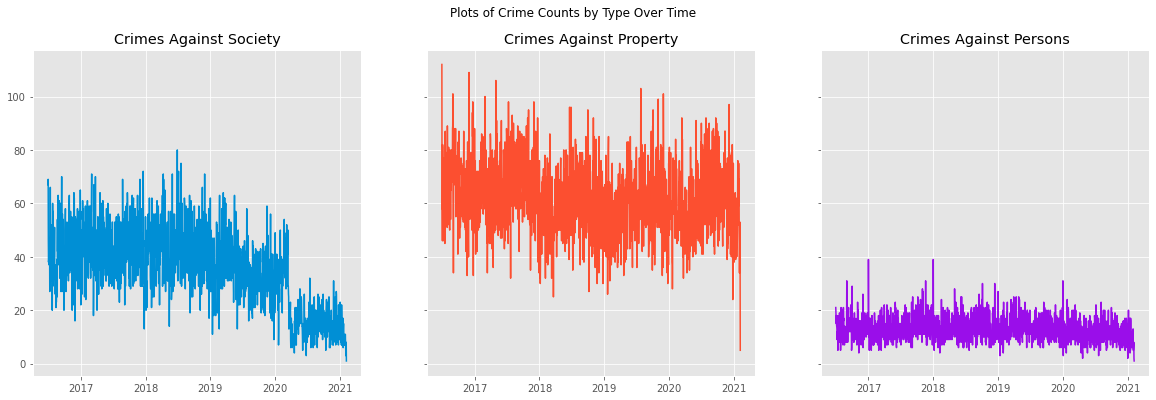

In [1788]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,6), sharex=True, sharey=True)

fig.suptitle('Plots of Crime Counts by Type Over Time')

ax1.plot(data['Day'], data['Crime Against Society Count'], c = '#008fd5')
ax1.set_title('Crimes Against Society')

ax2.plot(data['Day'], data['Crime Against Property Count'], c = '#fc4f30')
ax2.set_title('Crimes Against Property')

ax3.plot(data['Day'], data['Crime Against Person Count'], c = '#9a0eea')
ax3.set_title('Crimes Against Persons')

plt.show()


In [1789]:
features = data.copy()

In [1790]:
pattern = r'.*\s*(Rolling)\.*'

columns_to_drop = []

for column in data.columns:
    if not re.match(pattern, column):
        columns_to_drop.append(column)

In [1791]:
columns_to_drop.remove('Day_Of_Week')
columns_to_drop.remove('Day')
columns_to_drop.remove('Season')

In [1792]:
data = data.drop(columns_to_drop,axis=1)

In [1793]:
data.columns

Index(['Day', 'Day_Of_Week', 'Season',
       '30 Day Rolling Crimes Against Society Mean',
       '30 Day Rolling Crimes Against Property Mean',
       '30 Day Rolling Crimes Against Persons Mean',
       '7 Day Rolling Crimes Against Society Mean',
       '7 Day Rolling Crimes Against Property Mean',
       '7 Day Rolling Crimes Against Persons Mean',
       '2 Day Rolling Crimes Against Society Mean',
       ...
       '30 Rolling Mean Retail - Video Store Place Count',
       '30 Rolling Mean School/College Place Count',
       '30 Rolling Mean Street - Alley Place Count',
       '30 Rolling Mean Street - Bus Stop Place Count',
       '30 Rolling Mean Street - Commercial Place Count',
       '30 Rolling Mean Street - In vehicle Place Count',
       '30 Rolling Mean Street - Other Place Count',
       '30 Rolling Mean Street - Residential Place Count',
       '30 Rolling Mean Theater Place Count',
       '30 Rolling Mean Wooded Area Place Count'],
      dtype='object', length=108)

In [1794]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Day_Of_Week'] = le.fit_transform(data['Day_Of_Week'])
data['Season'] = le.fit_transform(data['Season'])

In [1795]:
data['Season'].value_counts()

2    460
0    460
3    397
1    364
Name: Season, dtype: int64

In [1796]:
data.head()

,Day,Day_Of_Week,Season,30 Day Rolling Crimes Against Society Mean,30 Day Rolling Crimes Against Property Mean,30 Day Rolling Crimes Against Persons Mean,7 Day Rolling Crimes Against Society Mean,7 Day Rolling Crimes Against Property Mean,7 Day Rolling Crimes Against Persons Mean,2 Day Rolling Crimes Against Society Mean,...,30 Rolling Mean Retail - Video Store Place Count,30 Rolling Mean School/College Place Count,30 Rolling Mean Street - Alley Place Count,30 Rolling Mean Street - Bus Stop Place Count,30 Rolling Mean Street - Commercial Place Count,30 Rolling Mean Street - In vehicle Place Count,30 Rolling Mean Street - Other Place Count,30 Rolling Mean Street - Residential Place Count,30 Rolling Mean Theater Place Count,30 Rolling Mean Wooded Area Place Count
0,2016-07-01,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2016-07-02,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2016-07-03,3,2,0.0,0.0,0.0,0.0,0.0,0.0,68.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2016-07-04,1,2,0.0,0.0,0.0,0.0,0.0,0.0,57.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016-07-05,5,2,0.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [1797]:
weather['date_time'] = pd.to_datetime(weather['date_time'])
weather['date_time']

0      2016-07-01
1      2016-07-02
2      2016-07-03
3      2016-07-04
4      2016-07-05
          ...    
1676   2021-02-01
1677   2021-02-02
1678   2021-02-03
1679   2021-02-04
1680   2021-02-05
Name: date_time, Length: 1681, dtype: datetime64[ns]

In [1798]:
## Merge weather and crime datasets

data = pd.merge(data, weather[['date_time','precipMM','mintempC','maxtempC','cloudcover','visibility','sunHour','windspeedKmph','totalSnow_cm']],
               left_on='Day', right_on='date_time')
data.head()

,Day,Day_Of_Week,Season,30 Day Rolling Crimes Against Society Mean,30 Day Rolling Crimes Against Property Mean,30 Day Rolling Crimes Against Persons Mean,7 Day Rolling Crimes Against Society Mean,7 Day Rolling Crimes Against Property Mean,7 Day Rolling Crimes Against Persons Mean,2 Day Rolling Crimes Against Society Mean,...,30 Rolling Mean Wooded Area Place Count,date_time,precipMM,mintempC,maxtempC,cloudcover,visibility,sunHour,windspeedKmph,totalSnow_cm
0,2016-07-01,0,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2016-07-01,12.3,19,29,23,8,13.5,8,0.0
1,2016-07-02,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2016-07-02,0.8,16,27,8,10,14.5,10,0.0
2,2016-07-03,3,2,0.0,0.0,0.0,0.0,0.0,0.0,68.0,...,0.0,2016-07-03,0.7,17,23,50,7,14.5,6,0.0
3,2016-07-04,1,2,0.0,0.0,0.0,0.0,0.0,0.0,57.5,...,0.0,2016-07-04,15.2,17,21,99,5,9.3,9,0.0
4,2016-07-05,5,2,0.0,0.0,0.0,0.0,0.0,0.0,42.0,...,0.0,2016-07-05,13.0,21,31,50,9,14.5,10,0.0


In [1799]:
data = data.drop(['date_time','Day'],axis=1)

# Part 4: XGB Model Performances

In [1874]:
def plotImportances(top_importances, top_features_list):
    x_values = list(range(len(top_importances)))
    plt.bar(x_values, top_importances, orientation= 'vertical')
    plt.xticks(x_values, top_features_list, rotation = 'vertical')
    plt.ylabel('Importance')
    plt.xlabel('Variable')
    plt.title('Top Variable Importances')
    fig = plt.gcf()
    fig.set_size_inches(7,7)
    plt.show()

In [1875]:
def getImportances(feature_importances):
    top_importances = []
    top_features_list = []

    for x,y in feature_importances:
        if(y > 0.04):
            top_features_list.append(x)
            top_importances.append(y)
    return top_features_list, top_importances

In [1876]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data,label1, test_size=0.25, shuffle=False)

In [1877]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=4)

param_grid2 = {
    'n_estimators': np.linspace(10,200).astype(int),
    'max_depth': [None] + list(np.linspace(3,20).astype(int)),
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree' : [0.3, 0.5, 0.7]
}

rs = RandomizedSearchCV(xgb, param_grid2, cv=KFold(10, shuffle=False), n_iter=10)

rs.fit(train, train_labels)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                         

In [1878]:
best_model = rs.best_estimator_

In [1879]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
predictions = best_model.predict(test)
mean_absolute_error(test_labels, predictions)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


20.474613139861553

In [1880]:
errors = abs(predictions - test_labels)
np.mean(errors)

20.474613139861553

In [1881]:
mean_squared_error(test_labels, predictions)

519.8679536293477

In [1882]:
mean_absolute_percentage_error(test_labels, predictions)

1.846915674983684

In [1883]:
mape = np.mean(100*(errors/test_labels))
accuracy = 100 - mape
accuracy

-84.69156749836841

In [1884]:
importances1 = list(best_model.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [1885]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

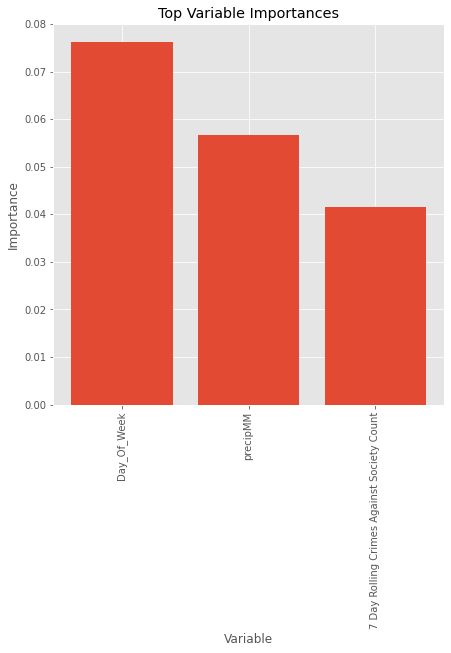

In [1886]:
plotImportances(top_importances1, top_features_list1)

In [1887]:
test_features = features[1260:]
dates = test_features['Day']

In [1888]:
len(test_features1)

337

In [1889]:
len(test_labels)

421

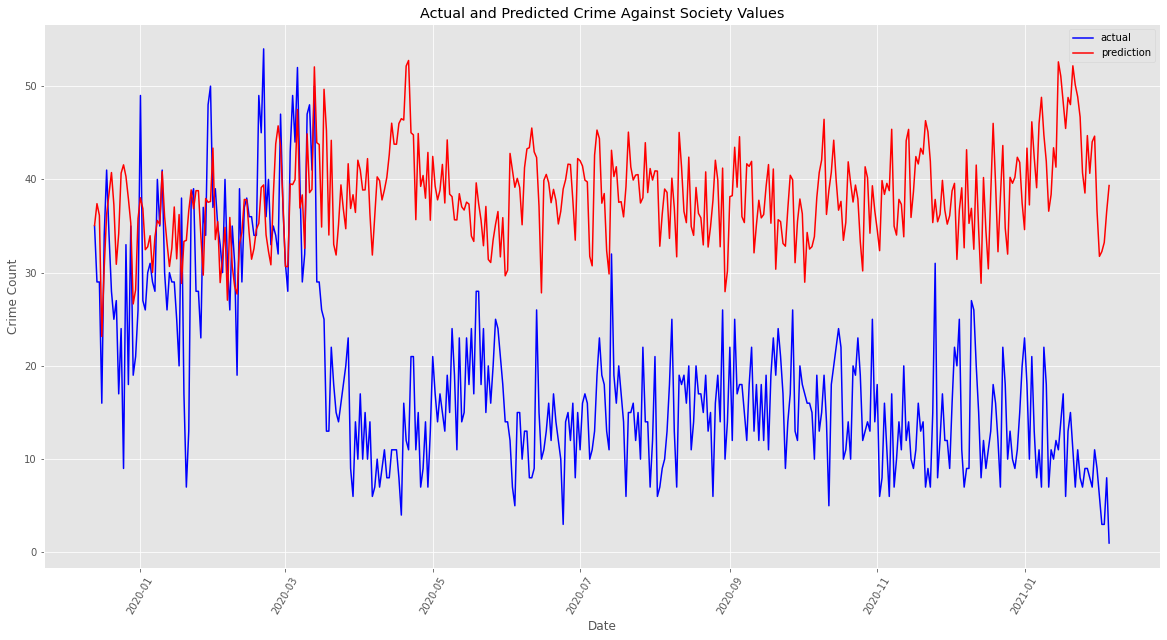

In [1890]:
plt.plot(dates, test_labels, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Society Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [1891]:
train2, test2, train_labels2, test_labels2 = train_test_split(data,label2, test_size=0.25,shuffle=False)

In [1892]:
rs2 = RandomizedSearchCV(xgb, param_grid2, cv=KFold(10, shuffle=False),n_iter=10)

rs2.fit(train2, train_labels2)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                         

In [1893]:
best_model2 = rs2.best_estimator_
predictions2 = best_model2.predict(test2)
mean_absolute_error(test_labels2, predictions2)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


10.296398325940492

In [1894]:
errors2 = abs(predictions2 - test_labels2)
np.mean(errors2)

10.296398325940492

In [1895]:
mean_squared_error(test_labels2, predictions2)

170.37620341695458

In [1896]:
mean_absolute_percentage_error(test_labels2, predictions2)

0.21878360879122516

In [1897]:
mape2 = np.mean(100*(errors2/test_labels2))
accuracy2 = 100 - mape2
accuracy2

78.12163912087748

In [1898]:
importances1 = list(best_model2.feature_importances_)
feature_list1 = list(data.columns)
feature_importances1 = [(feature, importance) for feature, importance in zip(feature_list1,importances1)]
feature_importances1 = sorted(feature_importances1, key = lambda x: x[1], reverse=True)

In [1899]:
top_features_list1, top_importances1 = getImportances(feature_importances1)

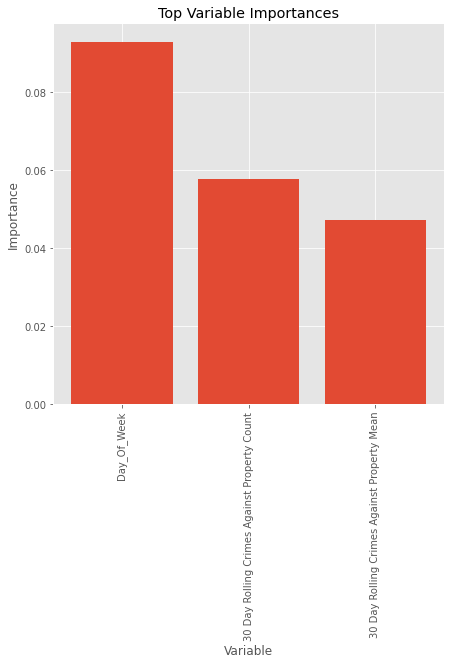

In [1900]:
plotImportances(top_importances1, top_features_list1)

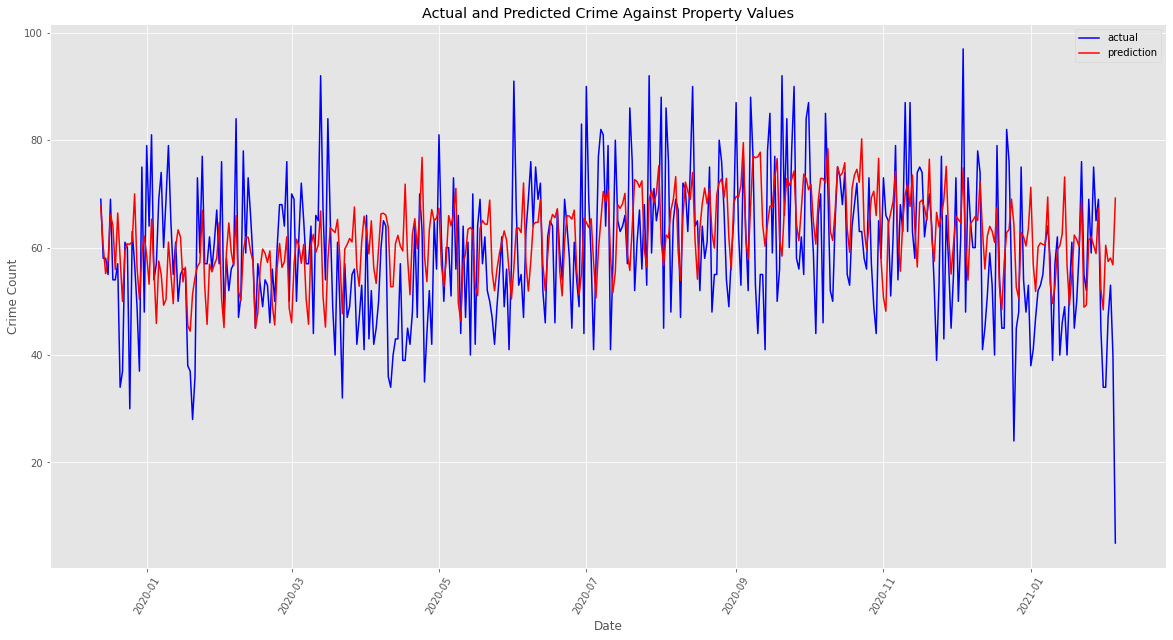

In [1901]:
plt.plot(dates, test_labels2, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions2, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Property Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()

In [1902]:
data2 = data.drop(['2 Day Rolling Crimes Against Property Count','2 Day Rolling Crimes Against Society Count',
                 '7 Day Rolling Crimes Against Property Count','7 Day Rolling Crimes Against Society Count',
                 '30 Day Rolling Crimes Against Property Count','30 Day Rolling Crimes Against Society Count',
                  '2 Day Rolling Crimes Against Property Mean','2 Day Rolling Crimes Against Society Mean',
                 '7 Day Rolling Crimes Against Property Mean','7 Day Rolling Crimes Against Society Mean',
                 '30 Day Rolling Crimes Against Property Mean','30 Day Rolling Crimes Against Society Mean'],axis=1)

In [1925]:
train3, test3, train_labels3, test_labels3 = train_test_split(data2,label3, test_size=0.25, shuffle=False)

In [1936]:
rs3 = RandomizedSearchCV(xgb, param_grid2, cv=KFold(10, shuffle=False), n_iter=10)

rs3.fit(train3, train_labels3)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")
/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing...
                   param_distributions={'colsample_bytree': [0.3, 0.5, 0.7],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [None, 3, 3, 3, 4, 4, 4, 5,
                                         

In [1937]:
best_model3 = rs3.best_estimator_
predictions3 = best_model3.predict(test3)
mean_absolute_error(test_labels3, predictions3)

/usr/local/lib/python3.6/dist-packages/xgboost/data.py:115: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "memory consumption")


3.6473723069505852

In [1938]:
errors3 = abs(predictions3 - test_labels3)
np.mean(errors3)

3.6473723069505852

In [1939]:
mean_squared_error(test_labels3, predictions3)

21.239283419858648

In [1940]:
mean_absolute_percentage_error(test_labels3, predictions3)

0.4646554664818153

In [1941]:
mape3 = np.mean(100*(errors3/test_labels3))
accuracy3 = 100 - mape3
accuracy3

53.53445335181846

In [1942]:
importances3 = list(best_model3.feature_importances_)
feature_list3 = list(data2.columns)
feature_importances3 = [(feature, importance) for feature, importance in zip(feature_list3,importances3)]
feature_importances3 = sorted(feature_importances3, key = lambda x: x[1], reverse=True)

In [1943]:
top_features_list3, top_importances3 = getImportances(feature_importances3)

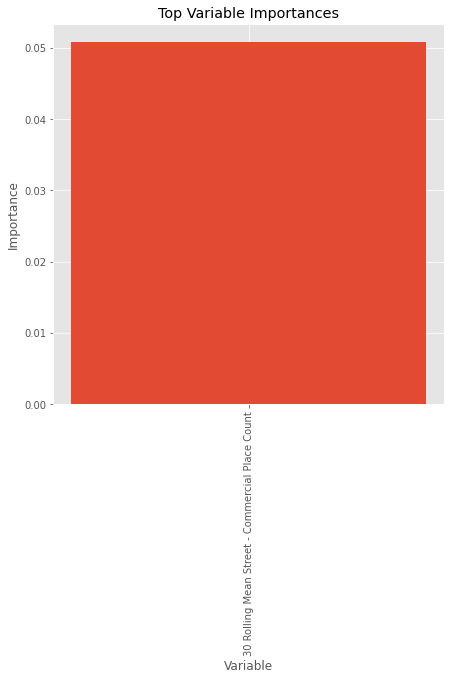

In [1944]:
plotImportances(top_importances3, top_features_list3)

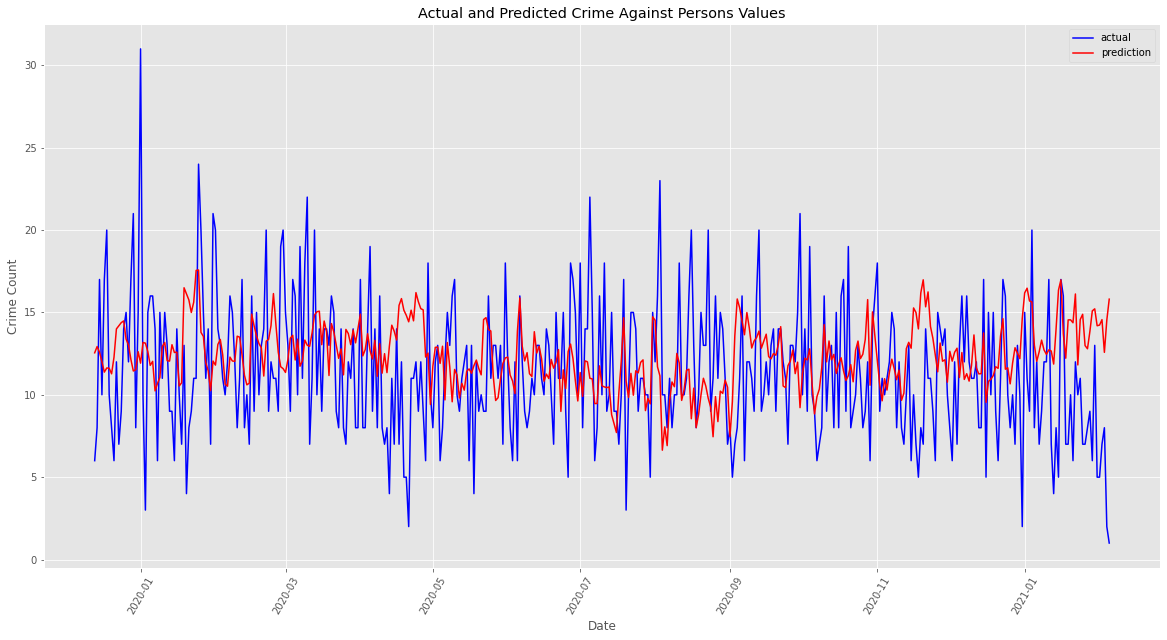

In [1945]:
plt.plot(dates, test_labels3, 'b-', label = 'actual')# Plot the predicted values
plt.plot(dates, predictions3, 'r-', label = 'prediction')
plt.xticks(rotation = '60'); 
plt.legend()# Graph labels
plt.xlabel('Date'); plt.ylabel('Crime Count'); plt.title('Actual and Predicted Crime Against Persons Values');
fig = plt.gcf()
fig.set_size_inches(20,10)
plt.show()